# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(study_results,mouse_metadata)

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
number_mice = len(combined_df["Mouse ID"].unique())
number_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ID = combined_df.loc[combined_df.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicate_mouse_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_ID_data_df = combined_df.loc[combined_df["Mouse ID"] == "g989", :]
duplicate_mouse_ID_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
clean_df = combined_df.loc[combined_df["Mouse ID"] != "g989", :]
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
number_mice_clean = len(clean_df["Mouse ID"].unique())
number_mice_clean

248

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#clean_df = combined_df.drop_duplicates(subset=["Mouse ID", "Timepoint"])
#clean_df.head()

In [8]:
# Checking the number of mice in the clean DataFrame.
#number_mice_clean = len(clean_df["Mouse ID"].unique())
#number_mice_clean

## Summary Statistics

In [9]:
#check to see if the mean is correct 
mean = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).mean()
mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).mean()
median = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).median()
variance = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).var()
std = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).std()
sem = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({"Mean Tumor Vomune": mean, "Median Tumor Volume": median, "Tumor Volume Variance": variance, "Tumor Volume Std. Dev": std, "Tumor Volume Std. Err": sem})
summary_df

,Mean Tumor Vomune,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_sta =  clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_sta

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [12]:
%matplotlib inline

In [13]:
import matplotlib.pyplot as plt
import numpy as np

In [14]:
#get the total number of rows for Drug Regimen
mouse_ID_rows = clean_df["Drug Regimen"].value_counts()
mouse_ID_rows

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

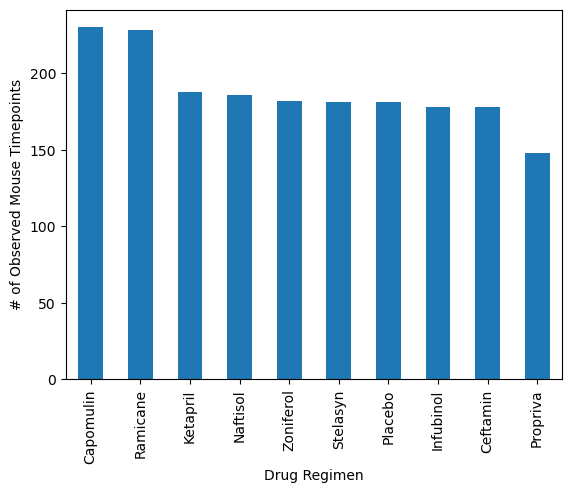

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_chart = mouse_ID_rows.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

In [16]:
#define x
x_axis = mouse_ID_rows.index.values
x_axis

array(['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol',
       'Stelasyn', 'Placebo', 'Infubinol', 'Ceftamin', 'Propriva'],
      dtype=object)

In [17]:

#define y 
y_axis = mouse_ID_rows.values
y_axis

array([230, 228, 188, 186, 182, 181, 181, 178, 178, 148])

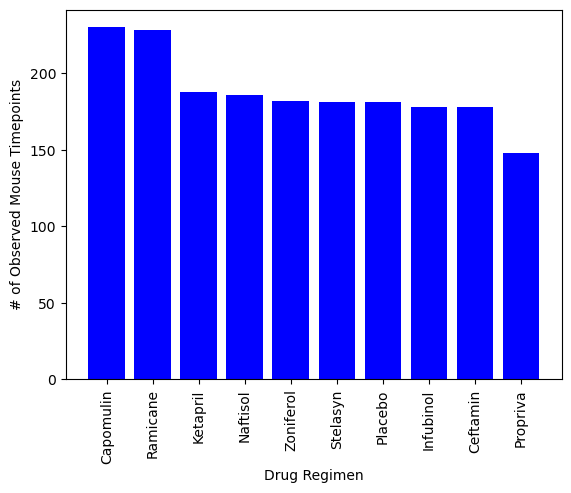

In [18]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(x_axis, y_axis, color='blue')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

In [19]:
# get the data frame first 
female_male_data_df = clean_df["Sex"].value_counts()
female_male_data_df
#print(type(female_male_data_df))

Sex
Male      958
Female    922
Name: count, dtype: int64

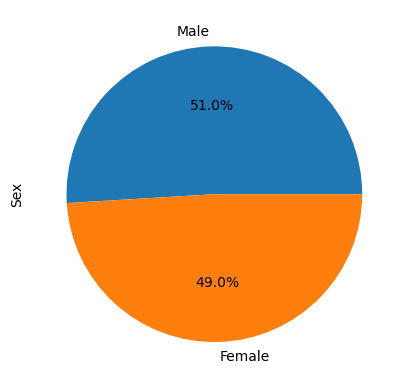

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
female_male_data_df.plot(kind="pie", autopct= "%1.1f%%")
#plt.axis("equal")
plt.ylabel('Sex')
plt.show()

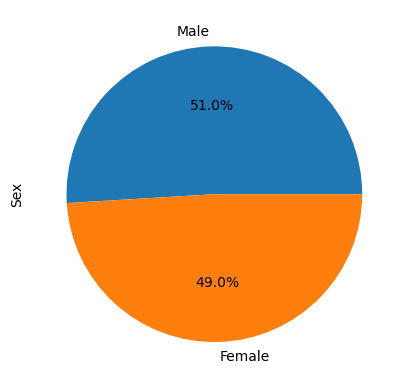

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
plot = female_male_data_df.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [22]:
#look at the Capomulin data 
Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
Capomulin_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [23]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
groupby_df = clean_df.groupby("Mouse ID")["Timepoint"].max()
groupby_df

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [24]:
max_timepoint_df = pd.merge(clean_df, groupby_df, on = "Mouse ID")
max_timepoint_df.head(20)

,Mouse ID,Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,b128,5,45.651331,0,Capomulin,Female,9,22,45
2,b128,10,43.270852,0,Capomulin,Female,9,22,45
3,b128,15,43.784893,0,Capomulin,Female,9,22,45
4,b128,20,42.731552,0,Capomulin,Female,9,22,45
5,b128,25,43.262145,1,Capomulin,Female,9,22,45
6,b128,30,40.605335,1,Capomulin,Female,9,22,45
7,b128,35,37.967644,1,Capomulin,Female,9,22,45
8,b128,40,38.379726,2,Capomulin,Female,9,22,45
9,b128,45,38.982878,2,Capomulin,Female,9,22,45


In [25]:
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_combine_df = max_timepoint_df.loc[max_timepoint_df["Timepoint_x"] == max_timepoint_df["Timepoint_y"]]
max_timepoint_combine_df.head(20)

,Mouse ID,Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y
9,b128,45,38.982878,2,Capomulin,Female,9,22,45
10,f932,0,45.000000,0,Ketapril,Male,15,29,0
18,g107,35,71.905117,0,Ketapril,Female,2,29,35
21,a457,10,49.783419,0,Ketapril,Female,11,30,10
30,c819,40,62.175705,1,Ketapril,Male,21,25,40
40,h246,45,74.104086,2,Ketapril,Male,13,30,45
50,p189,45,75.294936,4,Ketapril,Male,8,28,45
59,n923,40,66.229606,3,Ketapril,Male,19,30,40
62,q119,10,51.236606,0,Ketapril,Male,17,30,10
67,f993,20,52.079510,1,Naftisol,Male,21,28,20


In [26]:
del max_timepoint_combine_df["Timepoint_y"]
max_timepoint_combine_df.head()

,Mouse ID,Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
9,b128,45,38.982878,2,Capomulin,Female,9,22
10,f932,0,45.000000,0,Ketapril,Male,15,29
18,g107,35,71.905117,0,Ketapril,Female,2,29
21,a457,10,49.783419,0,Ketapril,Female,11,30
30,c819,40,62.175705,1,Ketapril,Male,21,25


In [27]:
#del max_timepoint_combine_df["Timepoint_y"]
max_timepoint_combine_df = max_timepoint_combine_df.rename(columns={"Timepoint_x": "Timepoint"})
max_timepoint_combine_df.head() 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
9,b128,45,38.982878,2,Capomulin,Female,9,22
10,f932,0,45.000000,0,Ketapril,Male,15,29
18,g107,35,71.905117,0,Ketapril,Female,2,29
21,a457,10,49.783419,0,Ketapril,Female,11,30
30,c819,40,62.175705,1,Ketapril,Male,21,25


In [28]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_timepoint_combine_df.head() 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
9,b128,45,38.982878,2,Capomulin,Female,9,22
10,f932,0,45.000000,0,Ketapril,Male,15,29
18,g107,35,71.905117,0,Ketapril,Female,2,29
21,a457,10,49.783419,0,Ketapril,Female,11,30
30,c819,40,62.175705,1,Ketapril,Male,21,25


In [35]:
#Put treatments into a list for for loop (and later for plot labels)

regiment_name = ["Capomulin", "Ramicane", "Infubinol", "Caftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_list = []
for regiment in regiment_name:
    tumor = max_timepoint_combine_df.loc[max_timepoint_combine_df["Drug Regimen"] == regiment, "Tumor Volume (mm3)"]
    
    tumor_list.append(tumor)

    quartiles = tumor.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq 

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor.loc[(tumor< lower_bound) | (tumor> upper_bound)]
    print(f"{regiment}, the outliers are: {outliers}")

Capomulin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol, the outliers are: 214    36.321346
Name: Tumor Volume (mm3), dtype: float64
Caftamin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [43]:
# Put treatments into a list for for loop (and later for plot labels)

regiment_name = ["Capomulin", "Ramicane", "Infubinol", "Caftamin"]
# Create empty list to fill with tumor vol data (for plotting)

tumor_list = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
 # Locate the rows which contain mice on each drug and get the tumor volumes
for regiment in regiment_name:
    tumor = max_timepoint_combine_df.loc[max_timepoint_combine_df["Drug Regimen"] == regiment, "Tumor Volume (mm3)"]
   
    # add subset 
    tumor_list.append(tumor)
  
    # Determine outliers using upper and lower bounds
    quartiles = tumor.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq 

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor.loc[(tumor< lower_bound) | (tumor> upper_bound)]
    print(f"{regiment}, the outliers are: {outliers}")

Capomulin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol, the outliers are: 214    36.321346
Name: Tumor Volume (mm3), dtype: float64
Caftamin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)


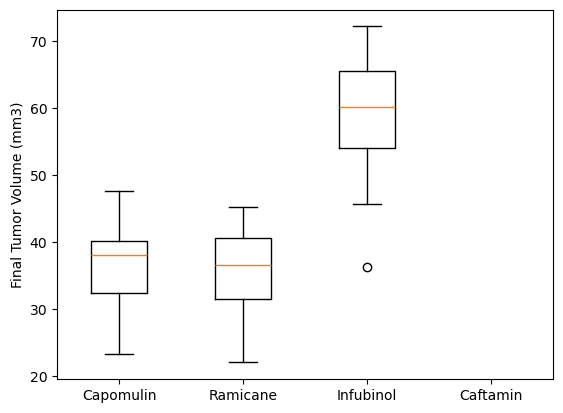

In [46]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_list, labels = regiment_name)
plt.show()

## Line and Scatter Plots

In [47]:
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
capomulin_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [51]:
mouce_in_capomulin = capomulin_df.loc[capomulin_df["Mouse ID"] == "l509",:]
mouce_in_capomulin

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1721,l509,0,45.000000,0,Capomulin,Male,17,21
1722,l509,5,45.851193,0,Capomulin,Male,17,21
1723,l509,10,46.759074,0,Capomulin,Male,17,21
1724,l509,15,47.488599,1,Capomulin,Male,17,21
1725,l509,20,48.070452,2,Capomulin,Male,17,21
1726,l509,25,44.006257,2,Capomulin,Male,17,21
1727,l509,30,44.708055,2,Capomulin,Male,17,21
1728,l509,35,40.207288,2,Capomulin,Male,17,21
1729,l509,40,40.770813,2,Capomulin,Male,17,21
1730,l509,45,41.483008,3,Capomulin,Male,17,21


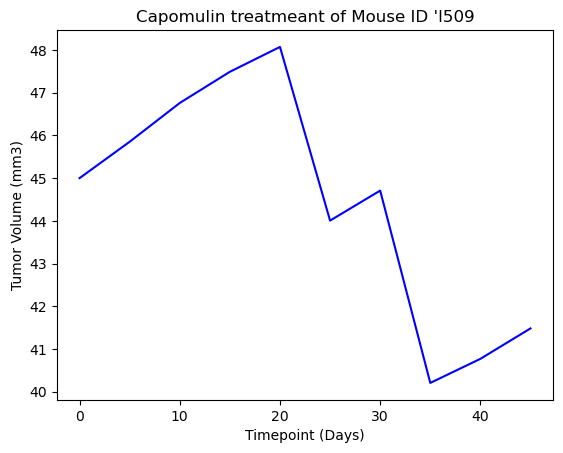

In [53]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
x_axis = mouce_in_capomulin["Timepoint"]
tumor_volume = mouce_in_capomulin["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title("Capomulin treatmeant of Mouse ID 'l509")
plt.plot(x_axis, tumor_volume,"blue")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [60]:
avg_df = capomulin_df.groupby(['Mouse ID'])
avg_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1883,m601,0,45.000000,0,Capomulin,Male,22,17
1884,m601,5,41.408591,1,Capomulin,Male,22,17
1885,m601,10,36.825367,1,Capomulin,Male,22,17
1886,m601,15,35.464612,1,Capomulin,Male,22,17


In [62]:
avg_df['Weight (g)'].mean()

Mouse ID
b128    22.0
b742    21.0
f966    17.0
g288    19.0
g316    22.0
i557    24.0
i738    20.0
j119    23.0
j246    21.0
l509    21.0
l897    19.0
m601    17.0
m957    19.0
r157    25.0
r554    17.0
r944    25.0
s185    17.0
s710    23.0
t565    17.0
u364    17.0
v923    21.0
w150    23.0
w914    21.0
x401    15.0
y793    17.0
Name: Weight (g), dtype: float64

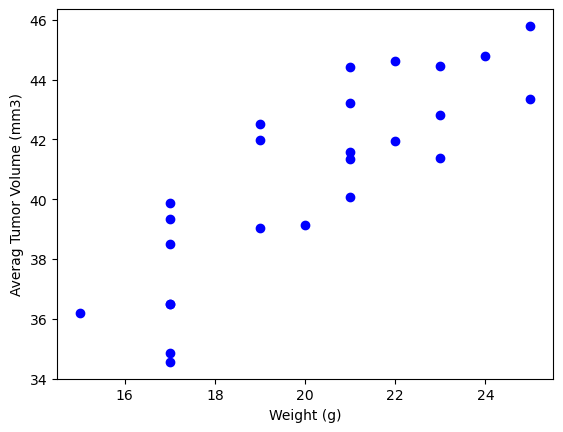

In [64]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

fig1, ax1 = plt.subplots()
plt.scatter(avg_df['Weight (g)'].mean(),avg_df['Tumor Volume (mm3)'].mean(),color="blue")
plt.xlabel("Weight (g)")
plt.ylabel("Averag Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

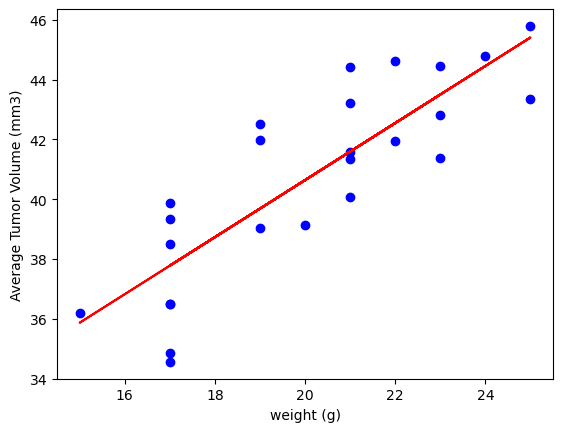

In [77]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = avg_df['Weight (g)'].mean()
y_values = avg_df['Tumor Volume (mm3)'].mean()
slope, int, r, p, std_err = st.linregress(x_values, y_values)
y = slope * x_values + int
fig1, ax1 = plt.subplots()
plt.scatter(x_values,y_values, color="blue")
plt.plot(x_values,x_values * slope + int,"r-")
plt.xlabel("weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()